In [1]:
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

In [2]:
BASE_URL = 'http://127.0.0.1:8000/api'

In [3]:
# image_name = "0c32061c-a21b-46e5-8b6b-b483b1829271_jpg.rf.cc038429f89871ce7b34b6ac3eb3e983.jpg"
# image_name = "00db272e-1d5f-4ff1-9cd6-1d8be42cb1a5_jpg.rf.f5818b173262a6f187db2af748531648.jpg"
image_name = "0ba4fa31-913c-45be-9e59-bc14fe4f324e_jpg.rf.89dddeb3544e94d2c5f1aa763b85823d.jpg"
# image_name = "DSC_0362_jpg.rf.9cb7a503fa1449af35eadb5259dd5181.jpg"

url = "http://127.0.0.1:8000/api/upload-image/"
file_path = f"./data/{image_name}"  # Replace with your local image path

with open(file_path, "rb") as image_file:
    response = requests.post(url, files={"image": image_file})
    print(response.status_code)
    print(response.json())


200
{'message': 'Image uploaded successfully.', 'image_path': './uploaded_images\\0ba4fa31-913c-45be-9e59-bc14fe4f324e_jpg.rf.89dddeb3544e94d2c5f1aa763b85823d.jpg'}


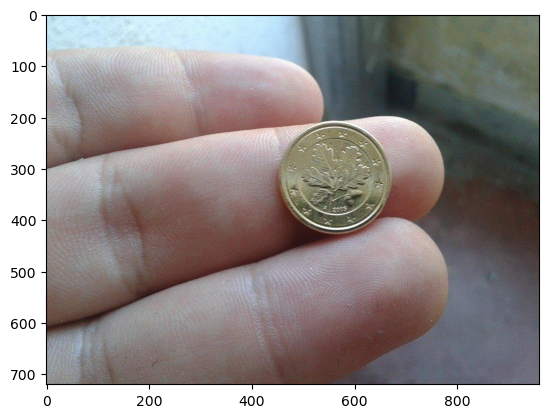

In [4]:
img = plt.imread(file_path)
plt.imshow(img)

In [5]:
# 2. Get detection for the uploaded image
response = requests.get(f"{BASE_URL}/detect-image/{image_name}/")
print("Detection Response:", response.json())

Detection Response: {'message': 'Detection completed successfully.'}


In [6]:
url = f"http://127.0.0.1:8000/api/get-detection/{image_name}"

response = requests.get(url)
print(response.status_code)
print(response.json())

200
{'image_name': '0ba4fa31-913c-45be-9e59-bc14fe4f324e_jpg.rf.89dddeb3544e94d2c5f1aa763b85823d.jpg', 'detection_results': [{'coin_id': 1, 'bounding_box': {'x_min': 451.1079406738281, 'y_min': 211.85250854492188, 'x_max': 674.27490234375, 'y_max': 428.3905029296875}}]}


In [7]:
def plot_image_with_bounding_boxes(image_path, detection_results):
    """Plot the image with bounding boxes overlaid."""
    # Open the image
    img = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(img)

    # Add bounding boxes
    for result in detection_results:
        bbox = result['bounding_box']
        x_min = bbox['x_min']
        y_min = bbox['y_min']
        width = bbox['x_max'] - x_min
        height = bbox['y_max'] - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Optionally, label the bounding box with coin_id
        coin_id = result.get('coin_id', '')
        ax.text(
            x_min, y_min - 10, f"ID: {coin_id}", color='red', fontsize=12, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='red')
        )

    # Configure plot
    ax.set_title('Image with Bounding Boxes')
    ax.axis('off')
    plt.show()



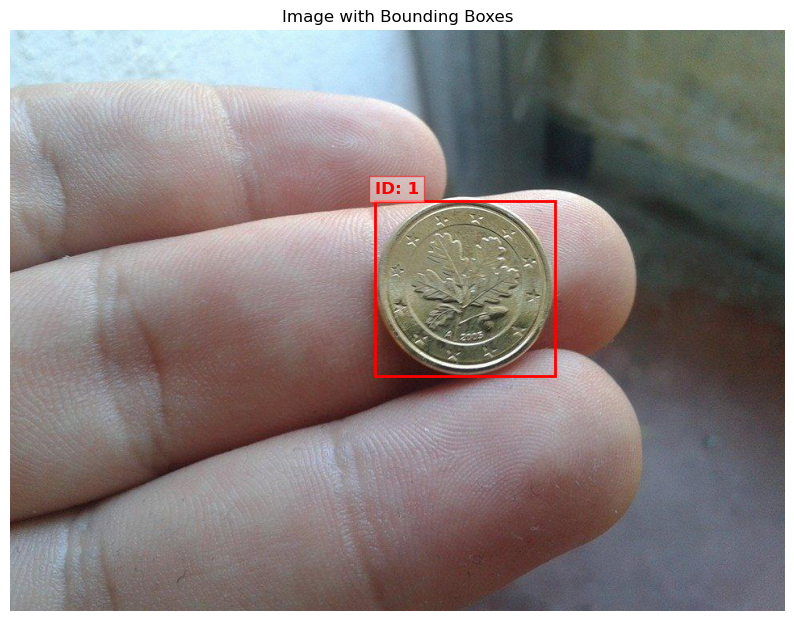

In [8]:
# provide the full path
image_path = os.path.join('./data', response.json()['image_name'])
plot_image_with_bounding_boxes(image_path, response.json()['detection_results'])

In [9]:
base_url = "http://127.0.0.1:8000/api/get-coin/"
params = {
    "image_name": image_name,  
    "object_number": 1      
}

# Send GET request
try:
    response = requests.get(base_url, params=params)
    response.raise_for_status()  # Raise HTTPError for bad responses (4xx and 5xx)

    # Parse and print the response
    result = response.json()
    print("Response from API:")
    print(result)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

Response from API:
{'image_name': '0ba4fa31-913c-45be-9e59-bc14fe4f324e_jpg.rf.89dddeb3544e94d2c5f1aa763b85823d.jpg', 'object_number': 1, 'x_center': 562.6914215087891, 'y_center': 320.1215057373047, 'radius': 111.58348083496094}


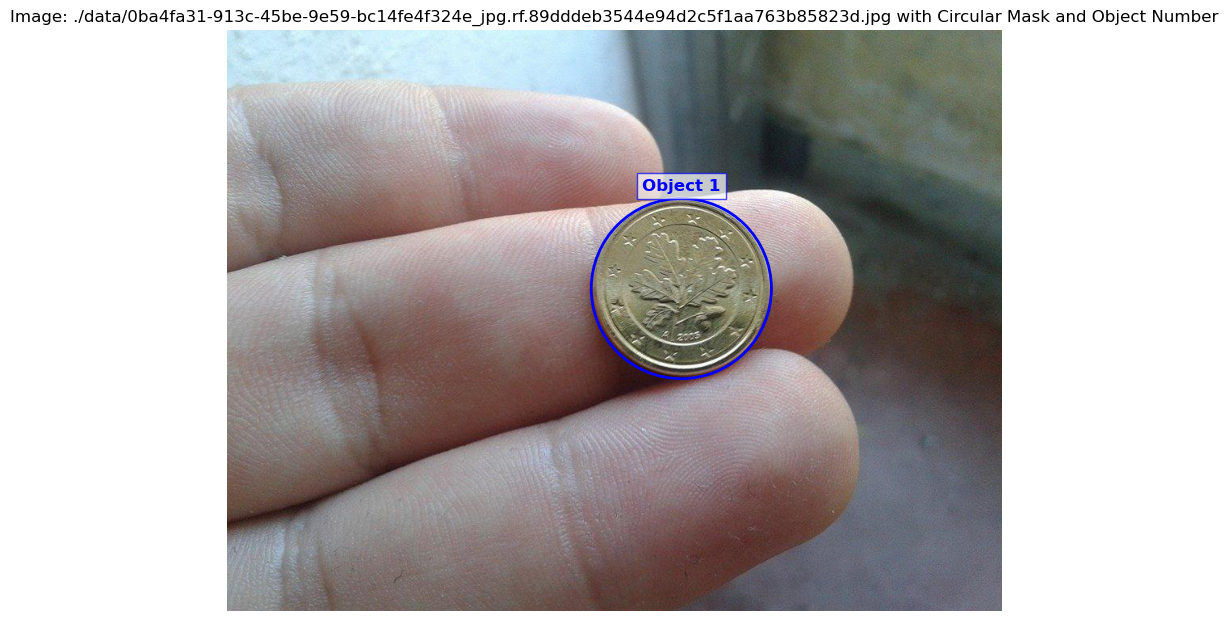

In [10]:
def plot_image_with_mask(image_name, x_center, y_center, radius, object_number):
    """
    Plot the image with a circular mask overlay and an object number label.

    Args:
        image_name (str): The name of the image file.
        x_center (float): The x-coordinate of the circle's center.
        y_center (float): The y-coordinate of the circle's center.
        radius (float): The radius of the circle.
        object_number (int): The object number to display above the circle.
    """
    # Open the image
    img = Image.open(image_name)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(img)

    # Add a circular mask
    circle = patches.Circle((x_center, y_center), radius, linewidth=2, edgecolor='blue', facecolor='none')
    ax.add_patch(circle)

    # Add object number text above the circle
    ax.text(
        x_center, y_center - radius - 10,  # Position the text slightly above the circle
        f"Object {object_number}",
        color="blue",
        fontsize=12,
        fontweight="bold",
        ha="center",  # Center the text horizontally
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="blue")
    )

    # Configure plot
    ax.set_title(f"Image: {image_name} with Circular Mask and Object Number")
    ax.axis('off')
    plt.show()

# Example usage
image_name = f"./data/{response.json()['image_name']}"
x_center = response.json()['x_center']
y_center = response.json()['y_center']
radius = response.json()['radius']
object_number = response.json()['object_number']

plot_image_with_mask(image_name, x_center, y_center, radius, object_number)
